In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cpp = pd.read_csv("cpp.csv")
python = pd.read_csv("python.csv")

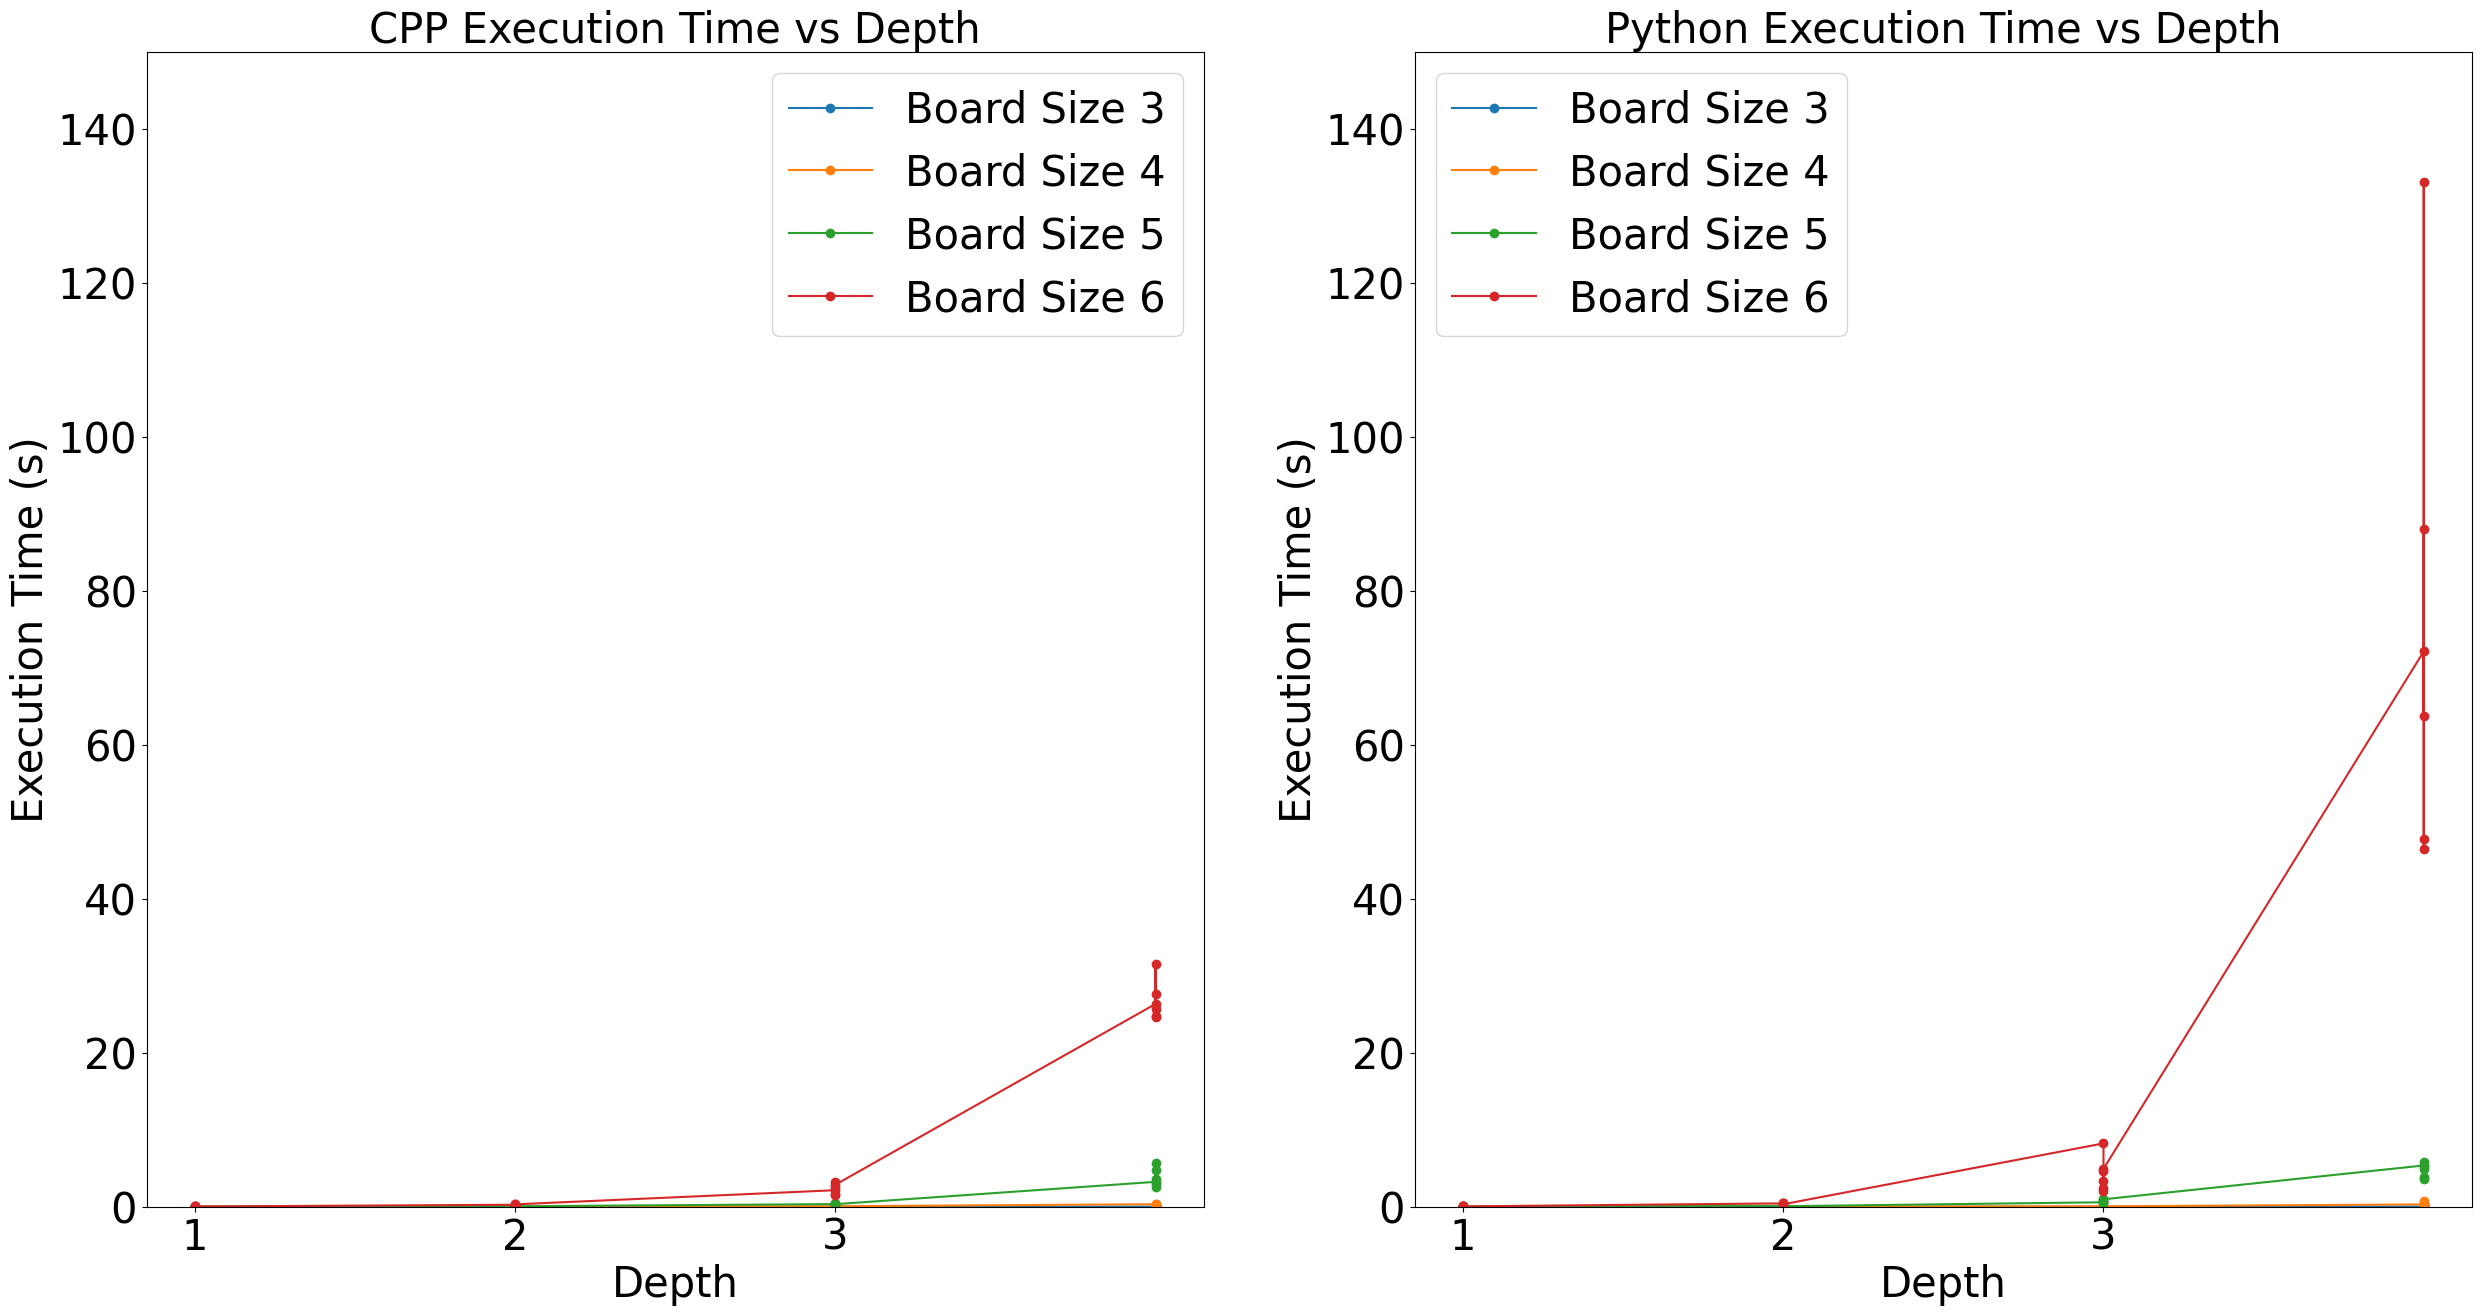

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

for size in cpp['board size'].unique():
    subset_cpp = cpp[cpp['board size'] == size]
    axes[0].plot(subset_cpp['depth'], subset_cpp['execution time'], marker='o', label=f'Board Size {size}')

    subset_python = python[python['board size'] == size]
    axes[1].plot(subset_python['depth'], subset_python['execution time'], marker='o', label=f'Board Size {size}')

for ax in axes:
    ax.set_xlabel("Depth", fontsize=30)
    ax.set_ylabel("Execution Time (s)", fontsize=30)
    ax.legend(fontsize=30)  
    ax.tick_params(labelsize=30)
    ax.set_ylim(0, 150)
    ax.set_xticks([1, 2, 3])

axes[0].set_title("CPP Execution Time vs Depth", fontsize=30)
axes[1].set_title("Python Execution Time vs Depth", fontsize=30)

plt.savefig("Execution Time vs Depth")

In [4]:
python_depth_ls = []
cpp_depth_ls = []
for i in range(5):
    python_depth_ls.append(len(np.where(python.loc[python.depth == i+1]["win"] == 0)[0]))
    cpp_depth_ls.append(len(np.where(cpp.loc[cpp.depth == i+1]["win"] == 0)[0]))

In [5]:
python_board_size_ls = []
cpp_board_size_ls = []
for i in range(3, 7):
    python_board_size_ls.append(len(np.where(python.loc[python["board size"] == i]["win"] == 0)[0]))
    cpp_board_size_ls.append(len(np.where(cpp.loc[cpp["board size"] == i]["win"] == 0)[0]))

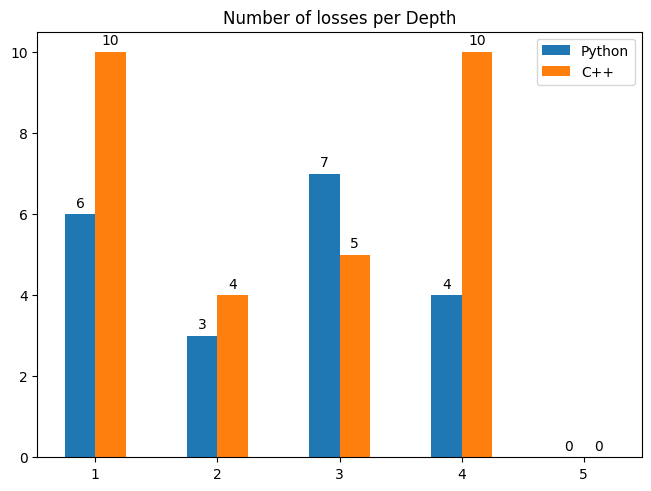

In [6]:
depths = np.arange(1, 6)
depth_ls = {
    'Python': python_depth_ls,
    'C++': cpp_depth_ls,
}

fig, ax = plt.subplots(layout='constrained')

multiplier = -0.5
width = 0.25
for lang, ls in depth_ls.items():
    offset = multiplier * width
    rects = ax.bar(depths + offset, ls, width, label=lang)
    ax.bar_label(rects, padding=3)
    multiplier += 1

plt.legend()
plt.title("Number of losses per Depth")
plt.savefig("Number of losses per Depth")
plt.show()

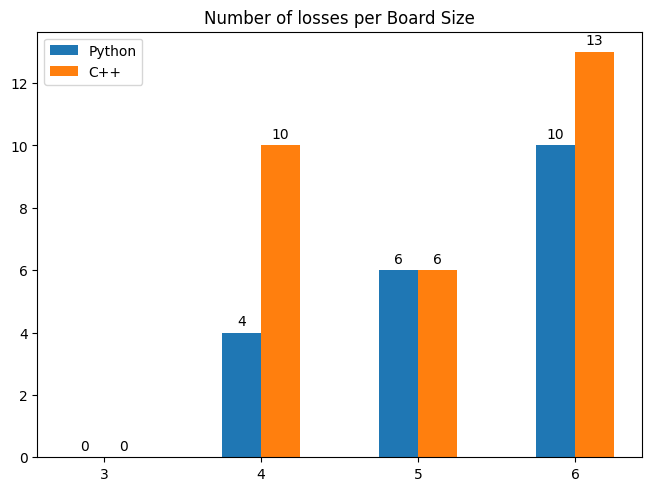

In [7]:
board_sizes = np.arange(3, 7)
board_size_ls = {
    'Python': python_board_size_ls,
    'C++': cpp_board_size_ls,
}

fig, ax = plt.subplots(layout='constrained')

multiplier = -0.5
width = 0.25
for lang, ls in board_size_ls.items():
    offset = multiplier * width
    rects = ax.bar(board_sizes + offset, ls, width, label=lang)
    ax.bar_label(rects, padding=3)
    multiplier += 1

plt.legend()
plt.title("Number of losses per Board Size")
plt.savefig("Number of losses per Board Size")
plt.xticks(board_sizes)
plt.savefig("Number of losses per Board Size")
plt.show()